# Eigenvectors & Diagonalization

---

## What is this?

This notebook introduces **eigenvalues and eigenvectors**,  
showing how a 2×2 matrix acts along directions that stay the same  
(except for scaling) when transformed.

---

## Core idea

- A matrix can stretch, compress, or rotate vectors.
- Some special directions (eigenvectors) do not rotate — only their length changes.
- The corresponding scaling factor is called an eigenvalue.
- If a matrix is diagonalizable, it can be written as:
  $
  A = P D P^{-1}
  \quad
  \text{where } D \text{ is diagonal}.
  $
- In this new basis, the matrix operation becomes simpler:  
  no mixing between directions!

---

## What we’ll do

1. Define a simple 2×2 matrix  
2. Compute its eigenvalues and eigenvectors  
3. Visualize the effect: show original vector vs. eigenvectors  
4. Diagonalize the matrix and verify `A = PDP⁻¹`  
5. Interpret what diagonalization means for repeated multiplication

---

## Goal

> See how eigenvectors and diagonalization simplify linear transformations  
> and reveal hidden structure in the matrix.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([[4, 2],
              [1, 3]])

eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues:", eigvals)
print("Eigenvectors (columns):\n", eigvecs)

Eigenvalues: [5. 2.]
Eigenvectors (columns):
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [4]:
eigvec1 = eigvecs[:, 0]
eigval1 = eigvals[0]

lhs = A @ eigvec1
rhs = eigval1 * eigvec1

print("A @ eigvec1:", lhs)
print("eigval1 * eigvec1:", rhs)

A @ eigvec1: [4.47213595 2.23606798]
eigval1 * eigvec1: [4.47213595 2.23606798]


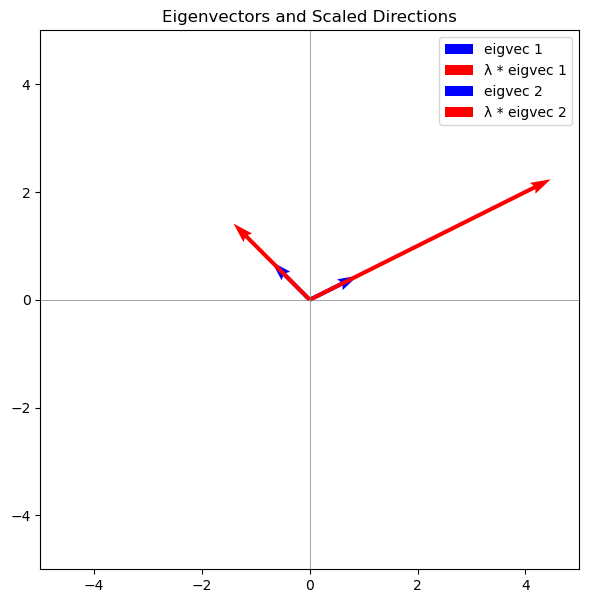

In [6]:
origin = np.zeros(2)

fig, ax = plt.subplots(figsize=(7,7))

for i in range(2):
    eigvec = eigvecs[:, i].real
    scaled_vec = eigvals[i].real * eigvec

    ax.quiver(*origin, *eigvec, color='b', angles='xy', scale_units='xy', scale=1, label=f'eigvec {i+1}')
    ax.quiver(*origin, *scaled_vec, color='r', angles='xy', scale_units='xy', scale=1, label=f'λ * eigvec {i+1}')

ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_aspect('equal')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend()
ax.set_title('Eigenvectors and Scaled Directions')
plt.show()

## Interpretation – Visual

- The **blue vectors** show the eigenvectors: directions that stay unchanged in direction when `A` acts.
- The **red vectors** show the effect of applying `A` to each eigenvector:
  - The vector is scaled by its eigenvalue.
  - The direction does not change.
- This confirms that along these directions, the linear transformation only stretches or compresses — no rotation.
- Diagonalization uses these directions as a new basis to simplify the transformation.


In [7]:
# Form diagonal matrix D and P
P = eigvecs
D = np.diag(eigvals)
P_inv = np.linalg.inv(P)

# Reconstruct A
A_reconstructed = P @ D @ P_inv

print("Original A:\n", A)
print("Reconstructed A (PDP^-1):\n", A_reconstructed)


Original A:
 [[4 2]
 [1 3]]
Reconstructed A (PDP^-1):
 [[4. 2.]
 [1. 3.]]


## Interpretation

- Each eigenvector shows a direction that stays unchanged (except for scaling) when `A` acts.
- The eigenvalue tells how much that vector is stretched or compressed.
- Diagonalization means `A` can be rewritten as `P D P⁻¹`:
  - `P`: change of basis to the eigenvector directions.
  - `D`: diagonal matrix; each direction just scales by its eigenvalue.
- This makes it easy to compute powers:
  $
  A^n = P D^n P^{-1}
  \quad
  \text{where } D^n \text{ is trivial to compute.}
  $
- Geometrically, the transformation looks like:
  1. Change coordinates to the eigenbasis.
  2. Scale each axis independently.
  3. Change back to the original basis.

> Eigenvectors and diagonalization reveal the “natural” directions of a transformation.
